## cellanneal QuickStart
The example uses a subset of data from Massalha et al., 2020 (https://doi.org/10.15252/msb.20209682).

In [1]:
import pandas as pd
import cellanneal

#### 1) Import mixture and signature data into pandas DataFrames

In [2]:
# data paths, provide paths to the data on your system
# example paths are from MacOS, for Windows use backslash
mixture_path = "example_data/mixture_data_liver_tumor.csv"
signature_path = "example_data/signature_data_human_liver.csv"

In [3]:
# import bulk data
mixture_df = pd.read_csv(mixture_path, index_col=0)

In [4]:
# import single-cell based signature data
signature_df = pd.read_csv(signature_path, index_col=0)

In [5]:
# inspect sample names
list(mixture_df.columns)

['1_non_malignant_core',
 '2_non_malignant_border',
 '3_malignant_border',
 '4_malignant_core',
 '5_malignant_collagen']

In [6]:
# inspect cell type names names
list(signature_df.columns)

['B cells',
 'CAFs',
 'Cholangiocyte',
 'Hepatocytes',
 'Kupffer cells',
 'LSEC',
 'LVEC',
 'LVECm',
 'Myofibroblasts',
 'Pericytes',
 'Proliferation',
 'SAMs',
 'Stellate cells',
 'T cells_far',
 'T cells_tumor',
 'TM1',
 'cDC1',
 'cDC2',
 'Carcinoma']

#### 2) Identify gene sets for deconvolution

In [7]:
# produce lists of genes on which to base deconvolution
# choose minimum dispersion and min and max expression here
gene_dict = cellanneal.make_gene_dictionary(
    signature_df, mixture_df, disp_min=0.5, bulk_min=1e-5, bulk_max=0.01
)

3715 highly variable genes identified in cell type
        reference.
	2413 of these are within thresholds for sample 1_non_malignant_core
	2496 of these are within thresholds for sample 2_non_malignant_border
	2751 of these are within thresholds for sample 3_malignant_border
	2671 of these are within thresholds for sample 4_malignant_core
	2515 of these are within thresholds for sample 5_malignant_collagen


#### 3) Run cellanneal deconvolution

In [8]:
# run deconvolution, set parameters here
all_mix_df = cellanneal.deconvolve(
    signature_df, mixture_df, maxiter=1000, gene_dict=gene_dict
)

Deconvolving sample 1 of 5 (1_non_malignant_core) ...
Deconvolving sample 2 of 5 (2_non_malignant_border) ...
Deconvolving sample 3 of 5 (3_malignant_border) ...
Deconvolving sample 4 of 5 (4_malignant_core) ...
Deconvolving sample 5 of 5 (5_malignant_collagen) ...


#### 3b) Alternative: gene set identification and deconvolution in one step

In [9]:
all_mix_df = cellanneal.run_cellanneal(
    signature_df, mixture_df, disp_min=0.5, bulk_min=1e-5, bulk_max=0.01, maxiter=1000
)


+++ Constructing gene sets ... +++
3715 highly variable genes identified in cell type
        reference.
	2413 of these are within thresholds for sample 1_non_malignant_core
	2496 of these are within thresholds for sample 2_non_malignant_border
	2751 of these are within thresholds for sample 3_malignant_border
	2671 of these are within thresholds for sample 4_malignant_core
	2515 of these are within thresholds for sample 5_malignant_collagen

+++ Running cellanneal ... +++
Deconvolving sample 1 of 5 (1_non_malignant_core) ...
Deconvolving sample 2 of 5 (2_non_malignant_border) ...
Deconvolving sample 3 of 5 (3_malignant_border) ...
Deconvolving sample 4 of 5 (4_malignant_core) ...
Deconvolving sample 5 of 5 (5_malignant_collagen) ...


#### 4) Plot cellanneal results

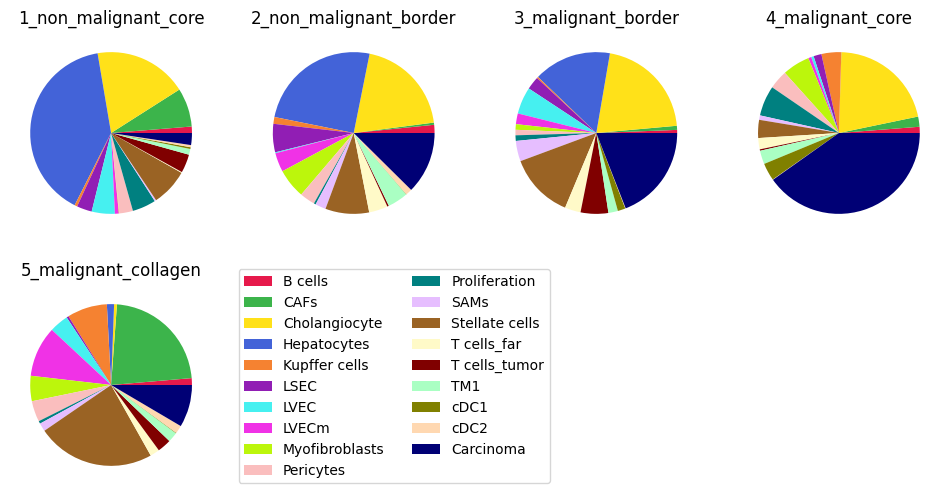

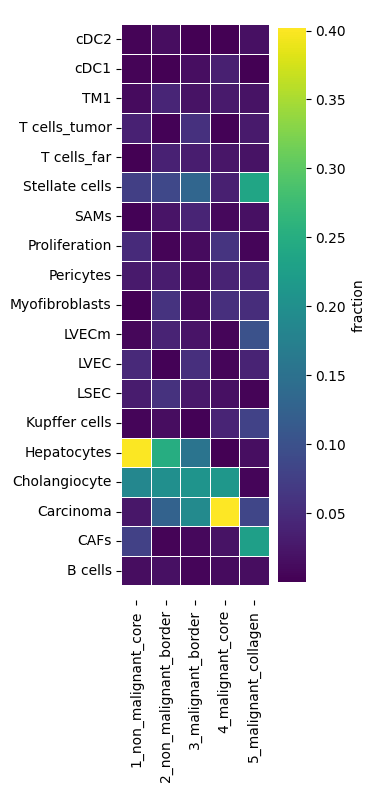

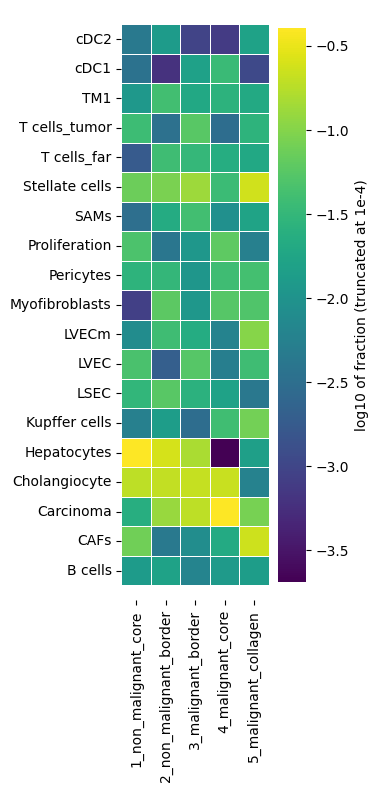

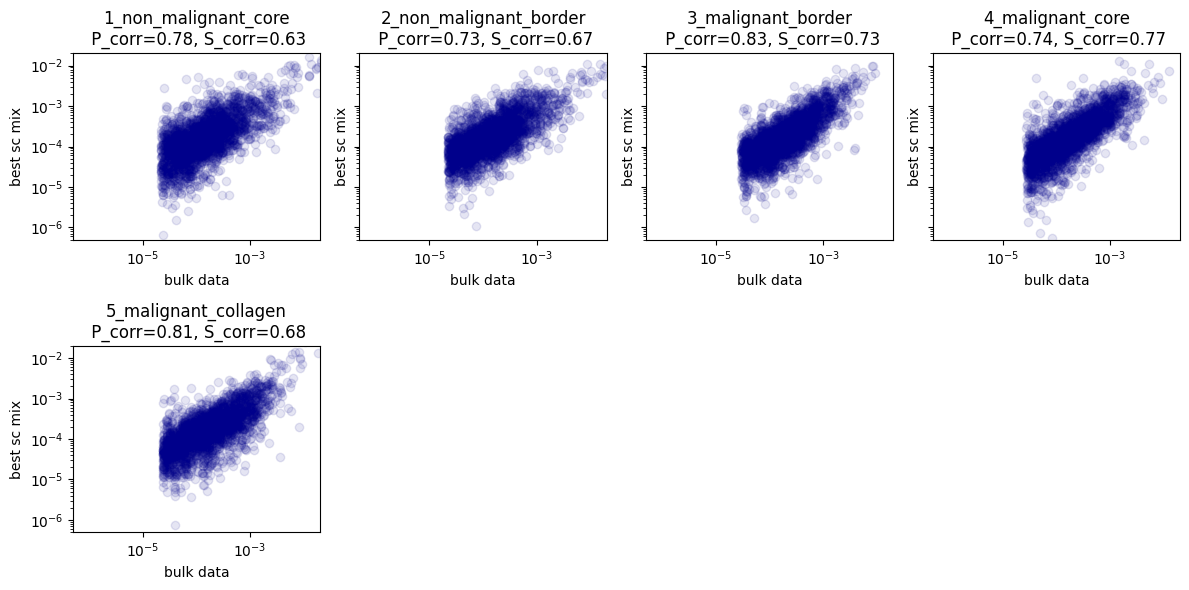

In [9]:
# plot results
cellanneal.plot_pies(all_mix_df)
cellanneal.plot_mix_heatmap(all_mix_df)
cellanneal.plot_mix_heatmap_log(all_mix_df)
cellanneal.plot_scatter(all_mix_df, mixture_df, signature_df, gene_dict)